In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-31.958025946506893 76.4398572040634
41.21920086534496 -130.24796105579492
-56.369536705946665 -92.8776803985427
18.34610228123519 -60.64446418539258
1.2252203330656215 -142.30158082467554
-70.38882539575951 -76.72208579669206
41.73637428076319 -110.479474407742
16.716092771490807 137.52280311548043
16.248383909691867 42.20182499968345
4.425532098582309 -125.91470927615367
-45.50905260402234 126.31400345631391
62.81138605459199 22.577423947180932
86.35023762444933 104.88409290884658
3.9582096221237464 136.01489432978798
-13.986715740206563 -176.18225398941058
54.26305396590345 51.49871823553218
-18.650415977390537 -95.39776183963872
-3.3634095226747434 43.883343900817096
-23.52069739629968 101.96614224597977
50.43859327010588 -90.62542288568801
-62.3516528021722 4.990722178367747
43.016366804595776 -85.3941953432923
77.35358476582871 166.98043098896233
-12.182446028074366 145.9742500745961
11.543986123090221 78.1623426142931
25.34878275627493 -55.35123418014314
77.80160195128497 136.89

35.615514268250735 162.0886503836507
12.817772576841875 -111.74282864765112
77.98777003364961 -104.72293002443382
-68.50570573234427 -160.9184642582241
35.21542290013555 -133.07776979668148
55.63761607669244 22.205435561481664
34.344108171965374 63.66415423575884
62.843296753562896 19.4029257787231
-77.25271782677737 58.939277927445175
-74.48312750079162 -178.06213237178306
-6.081153047147566 -55.58147006192635
54.363766273050004 -73.10034409544757
-68.18512691749434 133.21644459617306
-26.14404047358518 -132.88497926536425
7.429372055977552 -137.48982871724527
46.75084179345609 32.509480840722176
49.529162531919894 -173.2762011729079
17.377631001626554 -101.90766090496003
1.7325931317520684 -82.66161250226918
4.679592102180138 14.076605428561976
-33.234976544890046 117.17271586482883
0.8519443443014154 42.69522829426202
-8.096790508212834 11.257941632319245
80.21173757860336 40.222330894530444
49.4513216654905 -23.798748396452282


In [5]:
from citipy import citipy


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=abb01a2321e6366975fa3d162e508d4c


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | eureka
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | evanston
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | jizan
Processing Record 10 of Set 1 | esperance
Processing Record 11 of Set 1 | ilmajoki
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | kloulklubed
Processing Record 14 of Set 1 | halalo
City not found. Skipping...
Processing Record 15 of Set 1 | isakly
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | sioux lookout
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | forest hills
Processing Recor

Processing Record 40 of Set 4 | valdosta
Processing Record 41 of Set 4 | constitucion
Processing Record 42 of Set 4 | trelew
Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 4 | bonavista
Processing Record 45 of Set 4 | padang
Processing Record 46 of Set 4 | husavik
Processing Record 47 of Set 4 | santa vitoria do palmar
Processing Record 48 of Set 4 | saleaula
City not found. Skipping...
Processing Record 49 of Set 4 | paris
Processing Record 50 of Set 4 | laguna
Processing Record 1 of Set 5 | nanzhang
Processing Record 2 of Set 5 | palmer
Processing Record 3 of Set 5 | maracas
Processing Record 4 of Set 5 | torbay
Processing Record 5 of Set 5 | arraial do cabo
Processing Record 6 of Set 5 | muros
Processing Record 7 of Set 5 | bengkulu
Processing Record 8 of Set 5 | boshan
Processing Record 9 of Set 5 | gat
Processing Record 10 of Set 5 | poum
Processing Record 11 of Set 5 | coihaique
Processing Record 12 of Set 5 | cabedelo
Pro

Processing Record 26 of Set 8 | puerto ayacucho
Processing Record 27 of Set 8 | ojhar
Processing Record 28 of Set 8 | whithorn
Processing Record 29 of Set 8 | ewa beach
Processing Record 30 of Set 8 | malynivka
Processing Record 31 of Set 8 | lerwick
Processing Record 32 of Set 8 | san marcos
Processing Record 33 of Set 8 | whitehorse
Processing Record 34 of Set 8 | otradnoye
Processing Record 35 of Set 8 | cuitlahuac
Processing Record 36 of Set 8 | okhotsk
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | saldanha
Processing Record 39 of Set 8 | montrose
Processing Record 40 of Set 8 | saint anthony
Processing Record 41 of Set 8 | sison
Processing Record 42 of Set 8 | port augusta
Processing Record 43 of Set 8 | egvekinot
Processing Record 44 of Set 8 | suleja
Processing Record 45 of Set 8 | san luis
Processing Record 46 of Set 8 | meulaboh
Processing Record 47 of Set 8 | finschhafen
Processing Record 48 of Set 8 | college
Processing Record 49 of Set 8 | carinha

Processing Record 14 of Set 12 | honningsvag
Processing Record 15 of Set 12 | davila
Processing Record 16 of Set 12 | adre
Processing Record 17 of Set 12 | mizque
Processing Record 18 of Set 12 | cape elizabeth
City not found. Skipping...
Processing Record 19 of Set 12 | bure
Processing Record 20 of Set 12 | ballesteros
Processing Record 21 of Set 12 | ahipara
Processing Record 22 of Set 12 | mogadishu
Processing Record 23 of Set 12 | bahia honda
Processing Record 24 of Set 12 | faya
Processing Record 25 of Set 12 | floro
Processing Record 26 of Set 12 | havre-saint-pierre
Processing Record 27 of Set 12 | smithers
Processing Record 28 of Set 12 | caxito
Processing Record 29 of Set 12 | vung tau
Processing Record 30 of Set 12 | marystown
Processing Record 31 of Set 12 | nelson bay
Processing Record 32 of Set 12 | kibala
Processing Record 33 of Set 12 | mackay
Processing Record 34 of Set 12 | matadi
Processing Record 35 of Set 12 | tazmalt
Processing Record 36 of Set 12 | aykhal
Processi

In [16]:
len(city_data)

581

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,69.22,77,40,12.66,MU,2022-07-18 01:45:57
1,Eureka,40.8021,-124.1637,64.36,74,3,7.99,US,2022-07-18 01:41:05
2,Punta Arenas,-53.1500,-70.9167,33.91,86,20,27.63,CL,2022-07-18 01:44:18
3,Codrington,-38.2667,141.9667,50.36,69,100,13.20,AU,2022-07-18 01:45:58
4,Atuona,-9.8000,-139.0333,77.76,77,34,20.74,PF,2022-07-18 01:45:58
5,Ushuaia,-54.8000,-68.3000,35.26,87,75,17.27,AR,2022-07-18 01:45:58
6,Evanston,42.0411,-87.6901,75.20,87,75,13.80,US,2022-07-18 01:41:09
7,Airai,-8.9266,125.4092,67.21,54,4,3.02,TL,2022-07-18 01:45:59
8,Jizan,17.3333,42.6667,83.34,48,98,3.24,SA,2022-07-18 01:45:59
9,Esperance,-33.8667,121.9000,53.55,90,100,18.52,AU,2022-07-18 01:46:00


In [20]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity','Cloudiness',
'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2022-07-18 01:45:57,-20.3428,57.7575,69.22,77,40,12.66
1,Eureka,US,2022-07-18 01:41:05,40.8021,-124.1637,64.36,74,3,7.99
2,Punta Arenas,CL,2022-07-18 01:44:18,-53.1500,-70.9167,33.91,86,20,27.63
3,Codrington,AU,2022-07-18 01:45:58,-38.2667,141.9667,50.36,69,100,13.20
4,Atuona,PF,2022-07-18 01:45:58,-9.8000,-139.0333,77.76,77,34,20.74
5,Ushuaia,AR,2022-07-18 01:45:58,-54.8000,-68.3000,35.26,87,75,17.27
6,Evanston,US,2022-07-18 01:41:09,42.0411,-87.6901,75.20,87,75,13.80
7,Airai,TL,2022-07-18 01:45:59,-8.9266,125.4092,67.21,54,4,3.02
8,Jizan,SA,2022-07-18 01:45:59,17.3333,42.6667,83.34,48,98,3.24
9,Esperance,AU,2022-07-18 01:46:00,-33.8667,121.9000,53.55,90,100,18.52


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

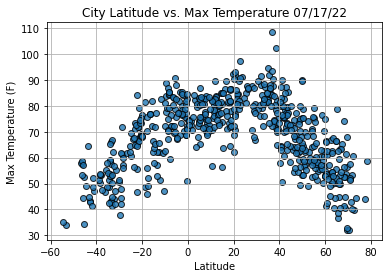

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

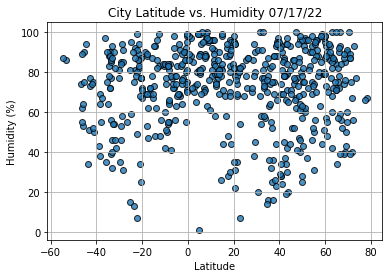

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

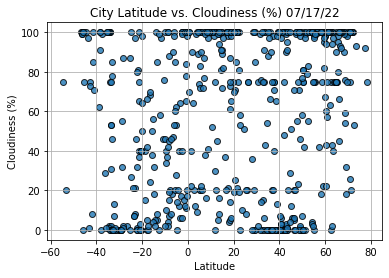

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

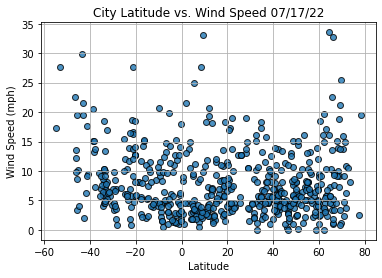

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()